# Question 1
Consider the following Python module:
a = 0
def b():
 global a
 a = c(a)
def c(a):
 return a + 2
After importing the module into the interpreter, you execute:
>>> b()
>>> b()
>>> b()
>>> a
?
What value is displayed when the last expression (a) is evaluated? Explain your
answer by indicating what happens in every executed statement.

In [1]:
a=0

def b():
    global a
    a = c(a)
    return a

def c(a):
    return a + 2

print(b())
print(b())
print(b())
print(a)

2
4
6
6


-In the first b() call the global a is used i.e. 0 which is passed to c() from which the value of a becomes 2 and hence b() returns 2

-In the second b() call the same process is followed and the a value becomes 4

-The same thing in the 3rd b() call. The value of a becomes 6

-As the a used in b() was declared global so the value change of a is made to the global a. Hence the final value of a becomes 6.

# Question 2

Function fileLength(), given to you, takes the name of a file as input and returns
the length of the file:
>>> fileLength('midterm.py')
284
>>> fileLength('idterm.py')
Traceback (most recent call last):
File "<pyshell#34>", line 1, in <module>
 fileLength('idterm.py')
File "/Users/me/midterm.py", line 3, in fileLength
 infile = open(filename)
FileNotFoundError: [Errno 2] No such file or directory:
'idterm.py'
As shown above, if the file cannot be found by the interpreter or if it cannot be read
as a text file, an exception will be raised. Modify function fileLength() so that a
friendly message is printed instead:


In [2]:
def fileLength(filename):
    try:
        open_file = open(filename, 'r')
        file_data = open_file.read()
        length_of_file = len(file_data)
        open_file.close()
        return length_of_file
    except:
        return "file "+ filename + " not found."

In [3]:
fileLength('w3c.html')

396

In [4]:
fileLength('idterm.py')

'file idterm.py not found.'

# Question 3

Write a class named Marsupial that can be used as shown below:
>>> m = Marsupial()
>>> m.put_in_pouch('doll')
>>> m.put_in_pouch('firetruck')
>>> m.put_in_pouch('kitten')
>>> m.pouch_contents()
['doll', 'firetruck', 'kitten']

In [5]:
class Marsupial:

    def __init__(self):
        self.new_list = []
        self.new_list.clear()

    def put_in_pouch(self, value):
        self.new_list.append(value)

    def pouch_contents(self):
        return self.new_list
    
m = Marsupial()
m.put_in_pouch('doll')
m.put_in_pouch('firetruck')
m.put_in_pouch('kitten')
print(m.pouch_contents())

['doll', 'firetruck', 'kitten']


In [16]:
class Kangaroo(Marsupial):

    def __init__(self,x,y):
        self.new_list = []
        self.new_list.clear ()
        self.x = x
        self.y = y
        
    def  __str__(self):
         return ("I am a Kangaroo located at coordinates ("+str(self.x)+","+str(self.y)+")")

    def jump(self,dx,dy):
        self.x = self.x + dx
        self.y = self.y + dy
    
        
k = Kangaroo(0,0)
print(k)
k.put_in_pouch('doll')
k.put_in_pouch('firetruck')
k.put_in_pouch('kitten')
print(k.pouch_contents())
k.jump(1,0)
k.jump(1,0)
k.jump(1,0)
print(k)

I am a Kangaroo located at coordinates (0,0)
['doll', 'firetruck', 'kitten']
I am a Kangaroo located at coordinates (3,0)


# Question 4

Write function collatz() that takes a positive integer x as input and prints the
Collatz sequence starting at x. A Collatz sequence is obtained by repeatedly applying
this rule to the previous number x in the sequence:
x = {
𝑥/2 𝑖𝑓 𝑥 𝑖𝑠 𝑒𝑣𝑒𝑛
3𝑥 + 1 𝑖𝑓 𝑥 𝑖𝑠 𝑜𝑑𝑑
Your function should stop when the sequence gets to number 1. Your
implementation must be recursive, without any loops.

In [6]:
def collatz(input):
    
    new_list = [input]
    if input < 1:
        return ("Enter a postive integer")

    if input == 1:
        return [1]
    
    elif input % 2 == 0:
        new_list.extend(collatz(int(input/2)))
    else:
        new_list.extend(collatz((input*3)+1))
    return new_list

In [7]:
collatz(1)

[1]

In [19]:
collatz(10)

[10, 5, 16, 8, 4, 2, 1]

# Question 5

Write a recursive method binary() that takes a non-negative
integer n and prints the binary representation of integer n.

In [8]:
def binary(input): 
    if input<0: 
        return ("Enter postive integer")
    
    elif input >=1: 
        return ((10*binary(int(input/2))) + (input%2))
        
    else: 
        return 0

In [9]:
binary(0)

0

In [10]:
binary(1)

1

In [11]:
binary(3)

11

In [12]:
binary(9)

1001

# Question 6

Implement a class named HeadingParser that can be used to parse an HTML
document, and retrieve and print all the headings in the document. You should
implement your class as a subclass of HTMLParser, defined in Standard Library
module html.parser. When fed a string containing HTML code, your class should
print the headings, one per line and in the order in which they appear in the
document. Each heading should be indented as follows: an h1 heading should have
indentation 0, and h2 heading should have indentation 1, etc. Test your
implementation using w3c.html.

In [13]:
from html.parser import HTMLParser
class HeadingParser(HTMLParser):
    flag = False
    indetation_value = 0
    def handle_starttag(self, tag, attrs):  
        if tag == "h1":  
            self.flag = True 
            self.indetation_value = 0
        elif tag == "h2":
            self.flag = True
            self.indetation_value = 1
        elif tag == "h3":
            self.flag = True
            self.indetation_value = 2
        elif tag == "h4":
            self.flag = True
            self.indetation_value = 3
        elif tag == "h5":
            self.flag = True
            self.indetation_value = 4
        elif tag == "h6":
            self.flag = True
            self.indetation_value = 5
    def handle_data(self, data):  
        if self.flag:
            print (self.indetation_value*"\t"+data)
    def handle_endtag(self, tag):  
        if tag == "h1":  
            self.flag = False
        elif tag == "h2":
            self.flag = False
        elif tag == "h3":
            self.flag = False
        elif tag == "h4":
            self.flag = False
        elif tag == "h5":
            self.flag = False
        elif tag == "h6":
            self.flag = False

infile = open('w3c.html')
content = infile.read()
infile.close()
hp = HeadingParser()
hp.feed(content)

W3C Mission
	Principles


# Question 8

Write SQL queries on the below database table that return:
a) All the temperature data.
b) All the cities, but without repetition.
c) All the records for India.
d) All the Fall records.
e) The city, country, and season for which the average rainfall is between 200
and 400 millimeters.
f) The city and country for which the average Fall temperature is above 20
degrees, in increasing temperature order.
g) The total annual rainfall for Cairo.
h) The total rainfall for each season.

In [ ]:
!pip install mysql-connector-python

In [ ]:
conda install -c anaconda mysql-connector-python

In [ ]:
import mysql.connector

mydb = mysql.connector.connect(
  host="localhost",
  user="root1",
  passwd="Password1"
)

print(mydb)

In [ ]:
import mysql.connector

mydatabase = mysql.connector.connect(
  host="localhost",
  user="root1",
  password="Password1",
  database = 'ProblemSet-2'
)

mycursor = mydatabase.cursor()

mycursor.execute("CREATE TABLE temperature_data (City VARCHAR(255), Country VARCHAR(255), Season VARCHAR(255),Temperature FLOAT,Rainfall FLOAT)")

In [ ]:
import mysql.connector

mydatabase = mysql.connector.connect(
  host="localhost",
  user="root1",
  password="password1",
  database = 'problemSet-2'
)

mycursor = mydatabase.cursor()

sql = "INSERT INTO temperature_data (City, Country, Season, Temperature, Rainfall) VALUES (%s,%s,%s,%s,%s)"
val = [
    ('Mumbai','India','Winter',24.8,5.9),
('Mumbai','India','Spring',28.4,16.2),
('Mumbai','India','Summer',27.9,1549.4),
('Mumbai','India','Fall',27.6,346.0),
('London','United Kingdom','Winter',4.2,207.7),
('London','United Kingdom','Spring',8.3,169.6),
('London','United Kingdom','Summer',15.7,157.0),
('London','United Kingdom','Fall',10.4,218.5),
('Cairo','Egypt','Winter',13.6,16.5),
('Cairo','Egypt','Spring',20.7,6.5),
('Cairo','Egypt','Summer',27.7,0.1),
('Cairo','Egypt','Fall',22.2,4.5)
]
mycursor.executemany(sql, val)
mydb.commit()
print(mycursor.rowcount, "record(s) inserted.")

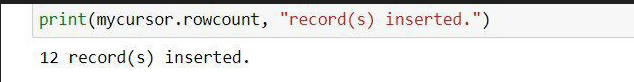

a) All the temperature data.

In [ ]:
import mysql.connector

mydatabase = mysql.connector.connect(
  host="localhost",
  user="root1",
  passwd="Password1",
  database="ProblemSet2"
)
mycursor = mydatabase.cursor()

sql = "select temperature from temperature_data"

mycursor.execute(sql)

myresult = mycursor.fetchall()

for x in myresult:
  print(x)

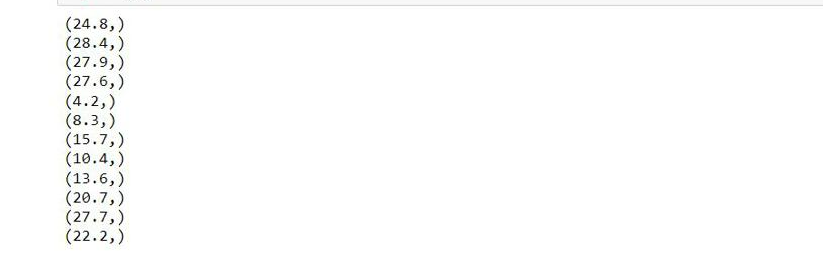

b) All the cities, but without repetition.

In [ ]:
import mysql.connector

mydatabase = mysql.connector.connect(
  host="localhost",
  user="root1",
  passwd="password1",
  database="ProblemSet-2"
)
mycursor = mydatabase.cursor()

sql = "select distinct(city) from temperature_data"

mycursor.execute(sql)

myresult = mycursor.fetchall()

for x in myresult:
  print(x)

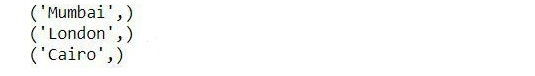

c) All the records for India.

In [ ]:
import mysql.connector

mydatabase = mysql.connector.connect(
  host="localhost",
  user="root1",
  passwd="Password1",
  database="problemSet-2"
)
mycursor = mydatabase.cursor()

sql = "select * from temperature_data where Country = 'India'"

mycursor.execute(sql)

myresult = mycursor.fetchall()

for x in myresult:
  print(x)

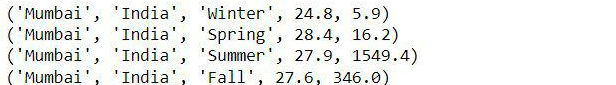

d) All the Fall records.

In [ ]:
import mysql.connector

mydatabase = mysql.connector.connect(
  host="localhost",
  user="root1",
  passwd="Password1",
  database="ProblemSet-2"
)
mycursor = mydatabase.cursor()

sql = "select * from temperature_data where Season = 'Fall'"

mycursor.execute(sql)

myresult = mycursor.fetchall()

for x in myresult:
  print(x)

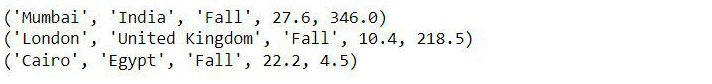

e) The city, country, and season for which the average rainfall is between 200 and 400 millimeters.

In [ ]:
import mysql.connector

mydatabase = mysql.connector.connect(
  host="localhost",
  user="root1",
  passwd="Password1",
  database="ProblemSet-2"
)
mycursor = mydatabase.cursor()

sql = "select City,Country,Season from temperature_data where Rainfall between 200 and 400"

mycursor.execute(sql)

myresult = mycursor.fetchall()

for x in myresult:
  print(x)

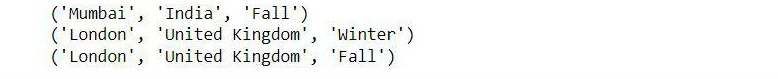

f) The city and country for which the average Fall temperature is above 20 degrees, in increasing temperature order.

In [ ]:
import mysql.connector

mydatabase = mysql.connector.connect(
  host="localhost",
  user="root1",
  passwd="Password1",
  database="ProblemSet-2"
)
mycursor = mydatabase.cursor()

sql = "select City,Country from temperature_data where Season = 'Fall' and Temperature > 20 order by temperature"

mycursor.execute(sql)

myresult = mycursor.fetchall()

for x in myresult:
  print(x)

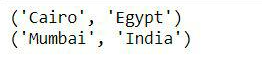

g) The total annual rainfall for Cairo.

In [ ]:
import mysql.connector

mydatabase = mysql.connector.connect(
  host="localhost",
  user="root1",
  passwd="Password1",
  database="ProblemSet-2"
)
mycursor = mydatabase.cursor()

sql = "select sum(rainfall) from temperature_data where city = 'Cairo'"

mycursor.execute(sql)

myresult = mycursor.fetchall()

for x in myresult:
  print(x)

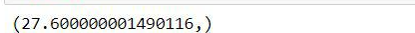

h) The total rainfall for each season.

In [ ]:
import mysql.connector

mydatabase = mysql.connector.connect(
  host="localhost",
  user="root1",
  passwd="Password1",
  database="problemset-2"
)
mycursor = mydatabase.cursor()

sql = "select season, sum(rainfall) from temperature_data group by Season"

mycursor.execute(sql)

myresult = mycursor.fetchall()

for x in myresult:
  print(x)

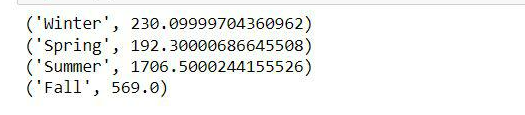

# Question 9

. Suppose list words is defined as follows:
>>> words = ['The', 'quick', 'brown', 'fox', 'jumps', 'over',
'the', 'lazy', 'dog']
Write list comprehension expressions that use list words and generate the following
lists:
a) ['THE', 'QUICK', 'BROWN', 'FOX', 'JUMPS', 'OVER', 'THE',
'LAZY', 'DOG']
b) ['the', 'quick', 'brown', 'fox', 'jumps', 'over', 'the',
'lazy', 'dog']
c) [3, 5, 5, 3, 5, 4, 3, 4, 3] (the list of lengths of words in list
words).
d) [['THE', 'the', 3], ['QUICK', 'quick', 5], ['BROWN',
'brown', 5], ['FOX', 'fox', 3], ['JUMPS', 'jumps', 5],
['OVER', 'over', 4], ['THE', 'the', 3], ['LAZY', 'lazy',
4], ['DOG', 'dog', 3]] (the list containing a list for every word of list
words, where each list contains the word in uppercase and lowercase and the
length of the word.)
e) ['The', 'quick', 'brown', 'fox', 'jumps', 'over', 'the',
'lazy', 'dog'] (the list of words in list words containing 4 or more
characters.)

In [7]:
words = ['The', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog']

def upper(words):
    upper_case_list = []
    for word in words:
        upper_case_list.append(word.upper())
    return upper_case_list

def lower(words):
    lower_case_list = []
    for word in words:
        lower_case_list.append(word.lower())
    return lower_case_list

def length_of_words(words):
    word_length_list = []
    for word in words:
        word_length_list.append(len(word))
    return word_length_list

def upper_lower_length_of_words(words):
    final_list = []
    upper_lower_length_of_words_list = []
    for word in words:
        upper_lower_length_of_words_list.clear()
        upper_lower_length_of_words_list.append(word.upper())
        upper_lower_length_of_words_list.append (word.lower())
        upper_lower_length_of_words_list.append (len(word))
        new_list = upper_lower_length_of_words_list.copy()
        final_list.append(new_list)
    return final_list

def check_word_length(words):
    word_length = []
    for word in words:
        if len(word) > 3:
            word_length.append(word)
    return word_length

print(upper(words))
print(lower(words))
print(length_of_words(words))
print(upper_lower_length_of_words(words))
print(check_word_length(words))

['THE', 'QUICK', 'BROWN', 'FOX', 'JUMPS', 'OVER', 'THE', 'LAZY', 'DOG']
['the', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog']
[3, 5, 5, 3, 5, 4, 3, 4, 3]
[['THE', 'the', 3], ['QUICK', 'quick', 5], ['BROWN', 'brown', 5], ['FOX', 'fox', 3], ['JUMPS', 'jumps', 5], ['OVER', 'over', 4], ['THE', 'the', 3], ['LAZY', 'lazy', 4], ['DOG', 'dog', 3]]
['quick', 'brown', 'jumps', 'over', 'lazy']
